# **Sistem Rekomendasi: Rekomendasi Aplikasi Windows App Store**

Oleh: Dicky Arya Pratama

Proyek Submission 2 - Machine Learning Terapan Dicoding



# **Pendahuluan**

Pada proyek ini, sistem yang buat adalah sistem rekomendasi aplikasi microsoft windows app store menggunakan content based filtering.

# **1. Mengimport library yang di butuhkan**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import plotly.express as px
from plotly.offline import iplot
import missingno as msno
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# **2. Mempersiapkan dataset**

![Sampul Dataset](https://i.ibb.co/rMYjQQX/download.png)

**2.1 Menupload dataset langsung ke storage google colab dalam bentuk sudah di extract/berformat CSV**

---



file dataset sudah tersimpan di directory /content/windows_store.csv

Informasi Dataset 

Sumber = https://www.kaggle.com/vishnuvarthanrao/windows-store

Lisensi = CC0: Public Domain

Kategori = Business, arts and entertaiment, computer science, software

Rating Penggunaan = 10.0

Jenis dan ukuran berkas = CSV(300kb)

# **3. Pemahaman Data**

**3.1 Memuat data pada dataframe di variable df dari file windows_store.csv**

In [2]:
df = pd.read_csv("/content/windows_store.csv")

In [3]:
# melihat isi dataset
df

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


In [4]:
#melihat jumlah data dari dataset
print('Jumlah data apps di windows store pada dataset: ', len(df.Name.unique()))

Jumlah data apps di windows store pada dataset:  5318


**3.1 Menguraikan variable-variable pada dataset windows_store.csv**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5322 entries, 0 to 5321
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5322 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   object 
 5   Price               5321 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [6]:
# melihat banyak data dan jenis-jenis category pada dataset
print('Banyak data: ', len(df.Name.unique()))
print('Jenis category yang ada: ', df.Category.unique())

Banyak data:  5318
Jenis category yang ada:  ['Books' 'Business' 'Developer Tools' 'Social' 'Food and Dining'
 'Government and Politics' 'Health and Fitness' 'Kids and Family'
 'Lifestyle' 'Multimedia Design' 'Music' 'Navigation and Maps'
 'News and Weather' nan]


In [7]:
# mencek value yang kosong pada dataset
df.isna().sum()

Name                  1
Rating                1
No of people Rated    0
Category              1
Date                  1
Price                 1
dtype: int64

In [8]:
# melihat shape pada dataset windows_store.csv
df.shape

(5322, 6)

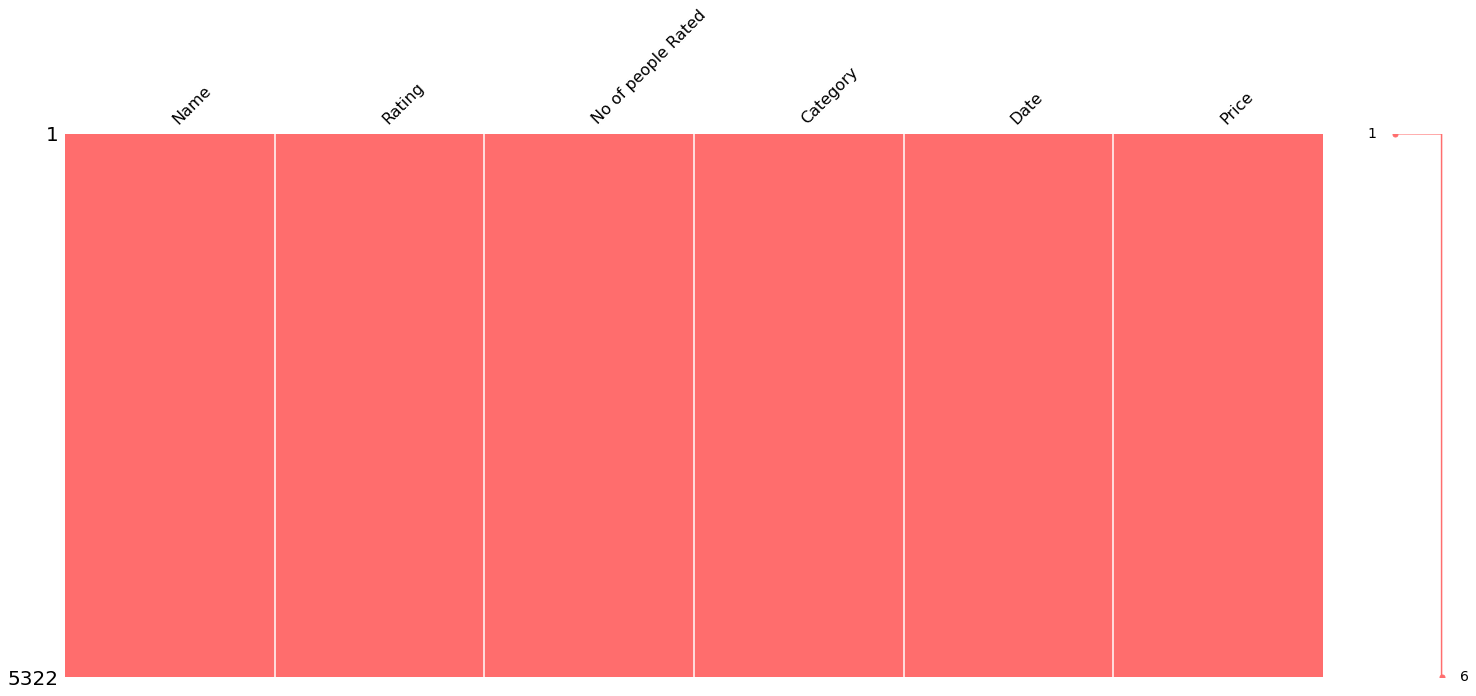

In [9]:
# visualisasi data kosong pada dataset, karna sedikit jadi tidak terlihat 
sorted_null = msno.nullity_sort(df, sort='ascending') 
figures = msno.matrix(sorted_null, color=(1, 0.43, 0.43))

# **4. Persiapan data**

**4.1 Pembersihan/penyesuaian data pada setiap kolom**

**4.1.1 Kolom rating**

In [10]:
# Melihat value yang unik pada kolom rating di dataset
df['Rating'].unique()

array([3.5, 3. , 2. , 4.5, 4. , 1. , 2.5, 5. , 1.5, nan])

In [11]:
# Mencari baris yang kosong dengan print value boolean df.isna()
print(df.isna())

       Name  Rating  No of people Rated  Category   Date  Price
0     False   False               False     False  False  False
1     False   False               False     False  False  False
2     False   False               False     False  False  False
3     False   False               False     False  False  False
4     False   False               False     False  False  False
...     ...     ...                 ...       ...    ...    ...
5317  False   False               False     False  False  False
5318  False   False               False     False  False  False
5319  False   False               False     False  False  False
5320  False   False               False     False  False  False
5321   True    True               False      True   True   True

[5322 rows x 6 columns]


In [12]:
# Melakukan penghapusan baris pada index 5321 karna value nya kosong
df.drop(df.index[5321], axis=0, inplace=True)

In [13]:
# Mencek lagi value kosong pada dataset, karna value kosong nya sedikit sekali maka lebih baik di drop
df.isna().sum()

Name                  0
Rating                0
No of people Rated    0
Category              0
Date                  0
Price                 0
dtype: int64

**4.1.2 Kolom Name**

In [14]:
# Melihat value unik pada kolom Nama/tidak perlu ada perbaikan
df['Name'].unique()

array(['Dynamic Reader',
       'Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob',
       'BookViewer', ..., 'MQTTSniffer', 'Dev Utils - JSON, CSV and XML',
       'Simply Text'], dtype=object)

**4.1.3 Kolom No Of People Rated**


In [15]:
# Melihat value unik pada kolom No Of People Rated/tidak perlu ada perbaikan
df['No of people Rated'].unique()

array([ 268,  627,  593,  684,  634,  399,  566,  175,  460,  363,  774,
        533,  707,  687,  825,  147,  931,  387,  830,  504,  224,  728,
        905,  779,  295,  202,  872,  975,  151,  459,  650,  645,  670,
        992,  355,  423,  425,  188,  808,  402,  554,  451,  311,  221,
        131,  550,  692,  664,  338,  150,  232,  419,  307,  661,  907,
        748,  534,  606,  371,  845,  492,  859,  501,  860,  985,  685,
        797,  973,  466,  864,  574,  546,  183,  196,  655,  900,  638,
        598,  688,  866,  238,  908,  134,  416,  749,  858,  938,  186,
        119,  156,  485,  424,  780,  181,  161,  225,  585,  709,  955,
        920,  841,  318,  583,  836,  628,  923,  735,  761,  143,  577,
        820,  524,  426,  814,  159,  885,  755,  770,  561,  126,  851,
        248,  506,  287,  789,  968,  862,  867,  639,  100,  674,  542,
        345,  704,  904,  163,  722,  662,  301,  747,  861,  950,  997,
        319,  850,  324,  587,  149,  396,  464,  1

**4.1.4 Kolom Category**


In [16]:
#Meliahat Value yang unik pada kolom category/tidak perlu ada perbaikan
df['Category'].unique()

array(['Books', 'Business', 'Developer Tools', 'Social',
       'Food and Dining', 'Government and Politics', 'Health and Fitness',
       'Kids and Family', 'Lifestyle', 'Multimedia Design', 'Music',
       'Navigation and Maps', 'News and Weather'], dtype=object)

**4.1.5 Kolom Date**

In [17]:
# #Meliahat Value yang unik pada kolom Date
df['Date'].unique()

array(['07-01-2014', '08-01-2014', '29-02-2016', ..., '13-03-2020',
       '11-12-2019', '08-08-2019'], dtype=object)

In [18]:
# Menghapus simbol '-' pada kolom date
df['Date'] = df['Date'].str.replace('-', '')
# Mengubah tipe data kolom date menjadi int
df['Date'] = df['Date'].astype('int')

**4.1.6 Kolom Price**

In [19]:
# Meliahat Value yang unik pada kolom Price
df['Price'].unique()

array(['Free', '₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00'], dtype=object)

In [20]:
# Menghapus simbol '₹'
df['Price'] = df['Price'].str.replace('₹', '')
# Menghapus simbol '.'
df['Price'] = df['Price'].str.replace('.', '')
# Menghapus space kosong
df['Price'] = df['Price'].str.replace(' ', '')
# Mengganti free menjadi 0
df['Price'] = df['Price'].str.replace('Free', '0')

In [21]:
# Cek kembali dataset nya untuk memastikan perubahan
df.tail(3)

,Name,Rating,No of people Rated,Category,Date,Price
5318,MQTTSniffer,2.5,500,Developer Tools,10042017,6400
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18112019,26900
5320,Simply Text,4.0,386,Developer Tools,23012014,21900


In [22]:
# Menghapus kolom ',' pada kolom price
df['Price'] = df['Price'].str.replace(',', '')

In [23]:
# Setelah tidak ada simbol lain selain angka, ganti tipedata nya menjadi int
df['Price'] = df['Price'].astype('int')

In [24]:
# Melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5321 entries, 0 to 5320
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                5321 non-null   object 
 1   Rating              5321 non-null   float64
 2   No of people Rated  5321 non-null   int64  
 3   Category            5321 non-null   object 
 4   Date                5321 non-null   int64  
 5   Price               5321 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 291.0+ KB


**4.2 Pembersihan data yang duplikat**

In [25]:
# Mencek data yang ada duplikat nya, hasil nya 0 jadi sudah benar
df.duplicated().sum()

0

**4.3 Visualisasi Data**

In [26]:
# Fungsi untuk plot distribusi data pada suatu kolom numerik
def plot_distribution(column:str, title:str):
  figures = px.histogram(data_frame=df,
                        x=column,
                        color='Price',
                        template='plotly_white',
                        marginal='box',
                        color_discrete_sequence=["#FF7171","#9FD8DF"],
                        barmode='overlay',
                        histfunc='count')

  figures.update_layout(font_family='Open Sans',
                        title=dict(text=title,
                                  x=0.5,
                                  font=dict(color="#333",size=20)),
                        hoverlabel=dict(bgcolor='white'))

  figures.update_xaxes(
      automargin=True
  )

  iplot(figures)

**4.3.1 Fitur Numerik**

In [27]:
# Menampilkan visualisasi data
for column in ["Rating","Date"]:
    plot_distribution(column=column, title=f"Distribusi fitur numerik pada kolom {column}")

In [28]:
# Menampilkan visualisasi data
for column in ["No of people Rated"]:
    plot_distribution(column=column, title=f"Distribusi fitur numerik pada kolom {column}")

**4.4 Restrukturisasi Data**

In [29]:
# Menyimpan nama-nama aplikasi pada dataframe baru
df_app_name = pd.DataFrame({'Name':df['Name']})
df_app_name.head()

,Name
0,Dynamic Reader
1,"Chemistry, Organic Chemistry and Biochemistry-..."
2,BookViewer
3,Brick Instructions
4,Introduction to Python Programming by GoLearni...


In [30]:
# Menggunakan kolom aplikasi sebagai index
df.set_index('Name',inplace=True)
df.head()

,Rating,No of people Rated,Category,Date,Price
Name,,,,,
Dynamic Reader,3.5,268,Books,7012014,0
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,Books,8012014,0
BookViewer,3.5,593,Books,29022016,0
Brick Instructions,3.5,684,Books,30012018,0
Introduction to Python Programming by GoLearningBus,2.0,634,Books,30012018,0


In [31]:
# Memilih semua kolom dengan tipe data object
column_object = df.Category[df.Category == 'object'].keys()
column_object

Index([], dtype='object', name='Name')

**4.4.1 Konversi Label Category Dengan One Hot Encoding**

In [32]:
# Memilih semua kolom dengan tipe data object
column_object = df.dtypes[df.dtypes == 'object'].keys()
column_object

Index(['Category'], dtype='object')

In [33]:
# Mengkonversi data kategori ke one-hot encoding
one_hot_label = pd.get_dummies(df[column_object])
one_hot_label.head(10)


,Category_Books,Category_Business,Category_Developer Tools,Category_Food and Dining,Category_Government and Politics,Category_Health and Fitness,Category_Kids and Family,Category_Lifestyle,Category_Multimedia Design,Category_Music,Category_Navigation and Maps,Category_News and Weather,Category_Social
Name,,,,,,,,,,,,,
Dynamic Reader,1,0,0,0,0,0,0,0,0,0,0,0,0
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",1,0,0,0,0,0,0,0,0,0,0,0,0
BookViewer,1,0,0,0,0,0,0,0,0,0,0,0,0
Brick Instructions,1,0,0,0,0,0,0,0,0,0,0,0,0
Introduction to Python Programming by GoLearningBus,1,0,0,0,0,0,0,0,0,0,0,0,0
Gurbani Reader,1,0,0,0,0,0,0,0,0,0,0,0,0
NFO Viewer,1,0,0,0,0,0,0,0,0,0,0,0,0
Text to Speech TTS,1,0,0,0,0,0,0,0,0,0,0,0,0
ACK Comics,1,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
# Menghapus kolom dengan tipe data object
df.drop(column_object,axis=1,inplace=True)
df.head()

,Rating,No of people Rated,Date,Price
Name,,,,
Dynamic Reader,3.5,268,7012014,0
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,8012014,0
BookViewer,3.5,593,29022016,0
Brick Instructions,3.5,684,30012018,0
Introduction to Python Programming by GoLearningBus,2.0,634,30012018,0


In [35]:
# Menyatukan one hot encoding dengan data keseluruhan
df = pd.concat([df,one_hot_label],axis=1)
df.head()

,Rating,No of people Rated,Date,Price,Category_Books,Category_Business,Category_Developer Tools,Category_Food and Dining,Category_Government and Politics,Category_Health and Fitness,Category_Kids and Family,Category_Lifestyle,Category_Multimedia Design,Category_Music,Category_Navigation and Maps,Category_News and Weather,Category_Social
Name,,,,,,,,,,,,,,,,,
Dynamic Reader,3.5,268,7012014,0,1,0,0,0,0,0,0,0,0,0,0,0,0
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,8012014,0,1,0,0,0,0,0,0,0,0,0,0,0,0
BookViewer,3.5,593,29022016,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Brick Instructions,3.5,684,30012018,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Introduction to Python Programming by GoLearningBus,2.0,634,30012018,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**4.4.2 Menstandarkan label numerik pada dataset**

In [36]:
# Memilih semua kolom dengan tipe data integer
column_int = df.dtypes[df.dtypes == 'int64'].keys()
column_int

Index(['No of people Rated', 'Date', 'Price'], dtype='object')

In [37]:
# Memilih semua kolom dengan tipe data float
column_float = df.dtypes[df.dtypes == 'float64'].keys()
column_float

Index(['Rating'], dtype='object')

In [38]:
# Menyatukan semua kolom dengan tipe data numerik
column_numeric = list(column_int) + list(column_float)
column_numeric

['No of people Rated', 'Date', 'Price', 'Rating']

In [39]:
# inisiasi minmaxscaler
scaler = MinMaxScaler()

In [40]:
# Melakukan Standarisasi Data
scaled = scaler.fit_transform(df[column_numeric])

In [41]:
# mengganti data numerik pada dataset dengan data yang sudah di standarisasi
i=0
for column in column_numeric:
    df[column] = scaled[:,i]
    i += 1

In [42]:
# melihat data setelah di standarisasi
df.head()

,Rating,No of people Rated,Date,Price,Category_Books,Category_Business,Category_Developer Tools,Category_Food and Dining,Category_Government and Politics,Category_Health and Fitness,Category_Kids and Family,Category_Lifestyle,Category_Multimedia Design,Category_Music,Category_Navigation and Maps,Category_News and Weather,Category_Social
Name,,,,,,,,,,,,,,,,,
Dynamic Reader,0.625,0.186667,0.199269,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",0.500,0.585556,0.232481,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
BookViewer,0.625,0.547778,0.930256,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
Brick Instructions,0.625,0.648889,0.963135,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
Introduction to Python Programming by GoLearningBus,0.250,0.593333,0.963135,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Inspeksi Data
df.describe()

,Rating,No of people Rated,Date,Price,Category_Books,Category_Business,Category_Developer Tools,Category_Food and Dining,Category_Government and Politics,Category_Health and Fitness,Category_Kids and Family,Category_Lifestyle,Category_Multimedia Design,Category_Music,Category_Navigation and Maps,Category_News and Weather,Category_Social
count,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000,5321.000000
mean,0.698177,0.501999,0.504315,0.002021,0.132870,0.127608,0.093967,0.031197,0.013155,0.099042,0.064837,0.092464,0.021988,0.141515,0.028942,0.090772,0.061643
std,0.247920,0.288653,0.295906,0.021509,0.339466,0.333684,0.291811,0.173867,0.113951,0.298746,0.246262,0.289707,0.146659,0.348585,0.167659,0.287312,0.240528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.625000,0.252222,0.235802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.750000,0.497778,0.500498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.875000,0.754444,0.765526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **5. Pembuatan Sistem Rekomendasi Content Based Filtering**


**5.1 Dengan model Nearest Neighbor (NN)**

In [44]:
# Membuat sistem rekomendasi dengan model Nearest Neighbor
# Meninisiasi model 
model = NearestNeighbors(metric='euclidean')

# Melakukan fitting model terhadap data
model.fit(df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [142]:
# Membuat fungsi untuk mendapatkan rekomendasi
# Dengan model Nearest Neighbor
def getRecommendedApps(appname:str, recommend_apps:int=6):
  print(f'Apabila anda menyukai aplikasi {appname[0]}\nMungkin 5 aplikasi berikut menarik bagi anda :')
  # Mencari aplikasi terdekat dengan aplikasi yang disukai pengguna
  distances, neighbors = model.kneighbors(df.loc[appname],n_neighbors=recommend_apps)
  # Memasukkan aplikasi yang tinggi tingkat ke samaan nya ke dalam list
  similar_app = []
  for appname in df_app_name.loc[neighbors[0][:]].values:
    similar_app.append(appname[0])
  # Memasukan skornya (jarak) pada sebuah list
  similar_distance = []
  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")
  # Mengembalikan sebuah dataframe berupa rekomendasi terhadap aplikasinya
  hasil = pd.DataFrame(data = {"Nama Aplikasi" : similar_app, "Tingkat Kesamaan" : similar_distance})
  # karna baris pada row dengan label 0 adalah nama aplikasi yang kita cari, maka di drop di dataframe nya
  hasil = hasil.drop(labels=0, axis=0)
  return hasil

In [145]:
getRecommendedApps(df_app_name.loc[121])

Apabila anda menyukai aplikasi Roxio MediaBook Reader
Mungkin 5 aplikasi berikut menarik bagi anda :


,Nama Aplikasi,Tingkat Kesamaan
1,"Computer Science, MIS and Networking-simpleNea...",99.97%
2,Comics World,99.96%
3,FreeCellSolverFree,99.95%
4,"KS2 (Math, English, Science)-simpleNeasyApp by...",99.92%
5,Citations 365,99.88%


**5.2 Dengan Cosine Similarity**

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(df_app_name['Name']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

['001',
 '04',
 '0x',
 '10',
 '100',
 '101',
 '106',
 '11',
 '12',
 '123',
 '13',
 '14',
 '15',
 '17',
 '18',
 '1800pocket',
 '1890cursomecanet',
 '19',
 '1971',
 '1987',
 '1c',
 '1st',
 '20',
 '2000',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '23',
 '23snaps',
 '24',
 '25',
 '25036e',
 '257',
 '2buntu',
 '2d',
 '2gb',
 '2k',
 '30',
 '300',
 '360',
 '365',
 '365agile',
 '3bmeteo',
 '3d',
 '3g',
 '3si',
 '4500',
 '4chan',
 '4d',
 '4ever',
 '4k',
 '4ps',
 '4rum',
 '4square',
 '4th',
 '4u2play',
 '5854fd',
 '64',
 '6tin',
 '6tum',
 '7days',
 '7digital',
 '7fm',
 '7forecasts',
 '7ways',
 '80',
 '80s',
 '87c72b',
 '8k',
 '8th',
 '90',
 '911',
 '96',
 '99',
 '9zen',
 'a5',
 'a_tale_of_two_cities_ebook',
 'aacr',
 'aajtak',
 'aanlyn',
 'aarsy',
 'aarti',
 'abb',
 'abc',
 'abcd',
 'abdominoplasty',
 'abilities',
 'abook',
 'about',
 'abp',
 'abs',
 'abv',
 'ac',
 'academic',
 'academy',
 'accelerator',
 'accent',
 'access',
 'accessibility',
 'accessorizer',
 'ac

In [48]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_app_name['Name']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(5321, 5971)

In [49]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis aplikasi
# Baris diisi dengan nama aplikasi
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_app_name.Name
).sample(22, axis=1).sample(10, axis=0)

,het,sobriety,wellcare,pet,人生必读100本书,glycemic,promanual,tom,an,ask,invoice,photo,chanakya,onedrive,24,beard,german,fax,impact,target,ad,journey
Name,,,,,,,,,,,,,,,,,,,,,,
NCERT Grade 12 Chemistry via Videos by GoLearningBus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
اختراعي,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stop Snoring Free App with Sound Exercises Download,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cizeta 3D Configurator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SQLPro for MSSQL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Delicacy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BloodDonors,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Enchanted Crayon Virtual Coloring Book,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rap Music Radio Player,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03881713,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03881713, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [52]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama aplikasi
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_app_name['Name'], columns=df_app_name['Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap aplikasi
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5321, 5321)


Name,7 minute,BibliaMundi,Fast Food Finder,Wellcare Enrollment Platform,Tamil News Papers
Name,,,,,
The 99 Names Of ALLAH (SWT),0.0,0.0,0.0,0.0,0.0
Al Quran,0.0,0.0,0.0,0.0,0.0
Host Me Panel,0.0,0.0,0.0,0.0,0.0
Best Hindi Ringtones,0.0,0.0,0.0,0.0,0.0
IBM Aspera Connect for Edge,0.0,0.0,0.0,0.0,0.0
WODconnect,0.0,0.0,0.0,0.0,0.0
Learn ABC Fun Free,0.0,0.0,0.0,0.0,0.0
MIDI Player for Microsoft Edge,0.0,0.0,0.0,0.0,0.0
Html Developer Kit 10,0.0,0.0,0.0,0.0,0.0


In [53]:
# Menghitung cosine similarity pada dataframe
cosine_sim = cosine_similarity(df)

# Menyimpan hasil perhitungan pada dataframe
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_app_name['Name'], columns=df_app_name['Name'])
cosine_sim_df.head(3)

Name,Dynamic Reader,"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",BookViewer,Brick Instructions,Introduction to Python Programming by GoLearningBus,Gurbani Reader,NFO Viewer,Text to Speech TTS,ACK Comics,Learn Biology and Human Body Anatomy by GoLearningBus,Coding Made Easy - SQL,Baani : Nitnem,iMac® 101,Complete C Programs,Historical Places in India,NCERT Grade 11 Chemistry via Videos by GoLearningBus,IPC sections,Wikini for Wikipedia,Biology Lingo,Comix,GRE Vocabulary Lists - Collection,Quran Word By Word,Flip CB Reader,WikiMed,BIG Book Of Shortcuts,My Shelf,MyeBooks,Just Origami,English-Bangla Dictionary[UWP],Comics World,Chambers English Dictionaries,NCERT Grade 12 Physics via Videos by GoLearningBus,Al-Quran Tajwid,Crafting Planner,Jalees Reader,Qaida,Common Core Math by GoLearningBus,திருக்குறள்,Keyboard Shortcuts for MS Office 2013-simpleNeasyApp by WAGmob,"Computer Science, MIS and Networking-simpleNeasyApp by WAGmob",...,Pengwin Enterprise,Pkpass,Bluetooth Terminal+,IP Scanner - Search for available IP addresses and open ports,Pixel Ruler,Centos8,Shadowsocks VPN,Wiggler - Pro,Neato BotVac Communication,Python Playground,Multilingual Translator,Javascript Studio Pro,SQLPro for SQLite,Modbus Monitor,RocketCake Professional,Icon Converter,"XML Hub - XML to JSON Converter, XML Formatter, XML Validator",ResX/ResW Editor & Translator,Offline Documentation Browser,Quick Icons,Bluetooth Serial Port,Sprite Basic 2 Programming Language,PairBLENow,SCADAvis.io Synoptic Editor,Littledot,Dev Cpp Free,IpTray,Database Designer SDK,TPipingHMI,EditPlus,0x Hex Viewer,Assets Resizer for Windows Store,WWWmaster,HexToolkit,Visual Studio Image Scaler,Get Color,JS King,MQTTSniffer,"Dev Utils - JSON, CSV and XML",Simply Text
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Dynamic Reader,1.000000,0.945111,0.867212,0.850395,0.787552,0.959935,0.961069,0.954234,0.946305,0.911202,0.851572,0.883065,0.872064,0.945894,0.904306,0.984815,0.730319,0.968823,0.912182,0.978196,0.976453,0.934047,0.816426,0.865066,0.977553,0.985277,0.819490,0.815889,0.938547,0.978881,0.936261,0.951436,0.948321,0.779792,0.904370,0.980023,0.854751,0.923799,0.878326,0.986643,...,0.255493,0.067073,0.368579,0.322293,0.355900,0.300348,0.186730,0.401129,0.132488,0.315525,0.255423,0.373065,0.342167,0.416459,0.355165,0.253531,0.425993,0.161337,0.068076,0.380019,0.347981,0.288946,0.425465,0.093466,0.421205,0.400594,0.159628,0.347754,0.428025,0.372874,0.362919,0.353232,0.315906,0.331283,0.143046,0.301722,0.151245,0.260682,0.378807,0.375311
"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",0.945111,1.000000,0.901440,0.902240,0.863708,0.927457,0.964609,0.892821,0.939004,0.894281,0.908922,0.894571,0.917658,0.986898,0.961684,0.900445,0.899793,0.932218,0.982924,0.977182,0.889939,0.983441,0.936562,0.912844,0.917338,0.918180,0.933328,0.918759,0.851411,0.990516,0.980321,0.996502,0.986406,0.894186,0.886130,0.945891,0.864441,0.848503,0.943453,0.982378,...,0.278944,0.178741,0.464271,0.428261,0.309345,0.301446,0.143146,0.397467,0.332105,0.364698,0.419574,0.381929,0.464871,0.480872,0.427368,0.403534,0.494129,0.361715,0.090271,0.469214,0.481628,0.424265,0.422887,0.176369,0.518970,0.444960,0.340349,0.394713,0.448202,0.457623,0.329236,0.413789,0.270400,0.311904,0.315367,0.425868,0.312102,0.337402,0.484207,0.384093
BookViewer,0.867212,0.901440,1.000000,0.998463,0.971573,0.951676,0.930580,0.934340,0.977481,0.986787,0.993685,0.996363,0.995134,0.884700,0.950928,0.890785,0.810739,0.939630,0.873472,0.916282,0.774388,0.859149,0.953079,0.987914,0.915015,0.783587,0.960484,0.973434,0.924209,0.903948,0.813692,0.901367,0.923044,0.969126,0.986533,0.844534,0.990691,0.941207,0.981891,0.899982,...,0.469152,0.162944,0.478247,0.563848,0.433361,0.518863,0.156806,0.519441,0.336667,0.543454,0.578677,0.569499,0.498954,0.494922,0.441490,0.566650,0.568638,0.440137,0.229763,0.436411,0.556271,0.602107,0.548456,0.278418,0.616346,0.492999,0.2

In [174]:
# Membuat fungsi untuk mendapatkan rekomendasi Cosine Similarity
def getRecommendedApps_cosine(appname:str, recommended_apps:int=5):
  print(f'Apabila pengguna menyukai aplikasi {appname[0]}\n5 aplikasi berikut ini juga mungkin akan disukai :')
  # Mencari nilai unik pada aplikasi yang disukai pengguna di baris dataframe cosine sim
  # Nilai unik (arr) dikembalikan dalam bentuk yang berurutan dari kecil ke besar 
  arr, ind = np.unique(cosine_sim_df.loc[appname[0]], return_index=True)
  # Memasukkan nama aplikasi yang serupa dari index kedua terakhir sampai index n terakhir
  similar_app = []
  for index in ind[-(recommended_apps+1):-1]:
    similar_app.append(df_app_name.loc[index][0])
  # Memasukkan skor cosine dari aplikasi yang serupa mulai dari index kedua terakhir sampai index n terakhir
  cosine_score = []
  for score in arr[-(recommended_apps+1):-1]:
    cosine_score.append(score)
  # Mengembalikan sebuah dataframe berupa rekomendasi terhadap aplikasinya
  hasil_cosine = pd.DataFrame(data = {"Nama Aplikasi" : similar_app, "Cosine_Similarity" : cosine_score})
  hasil_cosine = hasil_cosine.set_index("Nama Aplikasi")
  hasil_cosine = hasil_cosine.sort_values("Cosine_Similarity", axis = 0, ascending = False, na_position ='last')
  return hasil_cosine

In [175]:
getRecommendedApps_cosine(df_app_name.loc[12])

Apabila pengguna menyukai aplikasi iMac® 101
5 aplikasi berikut ini juga mungkin akan disukai :


,Cosine_Similarity
Nama Aplikasi,
Satta Matka,0.999822
Coding Made Easy - SQL,0.999075
English-German Dictionary And Phrasebook,0.998534
கிறிஸ்தவ பாமாலைகள்,0.998426
Learn Tamil via videos by GoLearningBus,0.998354


# **6. Evaluasi Model Nearest Neighbor (NN)**

**6.1 Score Dari calinski harabasz score**

In [56]:
calinski_harabasz_score(df, df_app_name)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1.805740778255372

# **Penutupan**

Model Machine Learning untuk memberikan rekomendasi aplikasi di windows app store telah berhasil di buat, setelah di uji dan di test untuk memberikan rekomendasi, model ini bekerja cukup baik karna data yang di rekomendasikan serupa dengan data yang kita cari, model ini masih bisa di kembangkan kedepan nya, seperti menggunakan deep learning.

**Referensi**

*   Dokumentasi Scikit-learn : https://scikit-learn.org/stable/modules/classes.html

*   Dokumentasi Plotly : https://plotly.com/python/
*   Dataset : https://www.kaggle.com/vishnuvarthanrao/windows-store
*   Lainya : https://www.kaggle.com/vishnuvarthanrao/windows-store/code



